In [165]:
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.linear_model import LogisticRegression    
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder  
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error 
%matplotlib inline
label_encoder = preprocessing.LabelEncoder()  
file = "./Cancer_Data.csv" 
df = pd.read_csv(file) 
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 
df.head() 
#M=1 B=0  
d_col= df.pop('diagnosis')
df.insert(32,'diagnosis',d_col)
#Drop Columns 
df.drop(columns = ['Unnamed: 32','id',],inplace=True) 
#df.head()

# Logisitc regression

The purpose of this logisitic regression is to find if the average measurements, worst measurements, or the Se measurments of a tumor is the best way to correctly diagnos it as cancerous or non-cancerous. I decided to use heatmaps to present the findings of the logisitic regression because they are very easy to read and understand for people who do not have a good understanding of how a typical logistic regression works. 

# Mean

Text(0.5, 257.44, 'Predicted label')

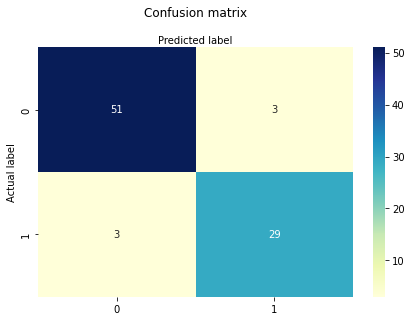

In [3]:
#Choose features
features = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 
df1 = pd.read_csv(file, usecols=features) 
#Create X and y, Create train_test_split
X = df1.iloc[:,1:].to_numpy()  
y = df1.iloc[:,0].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.15, 
                                                    random_state = 42,
                                                    stratify = None)   
logreg = LogisticRegression()
# fit  logistic regression
logreg.fit(X_train, y_train)
#predict X_test
y_pred = logreg.predict(X_test) 
#Confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 
#Visualize 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Worst

/Users/johncurran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 257.44, 'Predicted label')

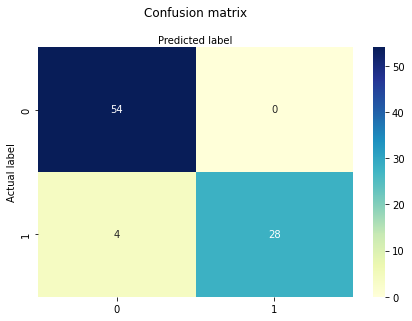

In [4]:
#Choose features
features = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] 
df1 = pd.read_csv(file, usecols=features) 
#Create X and y, Create train_test_split
X = df1.iloc[:,1:].to_numpy()  
y = df1.iloc[:,0].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.15, 
                                                    random_state = 42,
                                                    stratify = None)   
logreg = LogisticRegression()
# fit  logistic regression
logreg.fit(X_train, y_train)
#predict X_test
y_pred = logreg.predict(X_test) 
#Confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 
#Visualize 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Se

Text(0.5, 257.44, 'Predicted label')

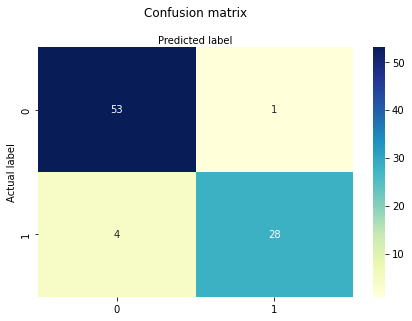

In [5]:
#Choose features
features = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'] 
df1 = pd.read_csv(file, usecols=features) 
#Create X and y, Create train_test_split
X = df1.iloc[:,1:].to_numpy()  
y = df1.iloc[:,0].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.15, 
                                                    random_state = 42,
                                                    stratify = None)   
logreg = LogisticRegression()
# fit  logistic regression
logreg.fit(X_train, y_train)
#predict X_test
y_pred = logreg.predict(X_test) 
#Confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 
#Visualize 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

While all three measurment types were effective in predicting if a tumor is cancerous or not, measuring the worst dimensions of a tumor(s) proved to be most effective. All three measurments also returned the result that a tumor being cancerous is 1.5-2x as likely to be cancerous compared to being non-cancerous. 

# Linear Regression

We are using a linear regression to observe if the average of different tumor measurments are correlated to the worst measurment for each patient. The purpose of doing this is to discover if the tumors in patients are all similar to one another and to attempt observing if there are  outliers in different tumor measurments.  While mean is not the best measurment to observe if there are any outliers, it's the only measurment of average that's in the data and it can still help in discovering if there is a pattern of major outliers in patients. 

In [158]:
#Determine X and y 
X = df["texture_mean"].values
y = df["texture_worst"].values
X = X.reshape(-1,1)



In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.15, 
                                                    random_state = 42, 
                                                    stratify = None)  
linreg = LinearRegression() 

In [160]:
# Fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions with test set
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [24.83214773 28.39227552], Actual Values: [24.64 26.58]


In [161]:
# Compute  MSE
mse = mean_squared_error(y_test, y_pred, squared=True)
print("MSE: {}".format(mse))

MSE: 4.241117416520689


In [162]:
#Visualize the Regression

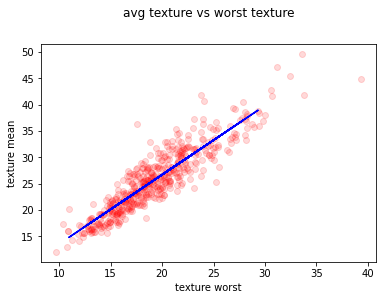

In [164]:
plt.scatter(X_train, y_train,color='r',alpha=0.15) 
plt.title('avg texture vs worst texture', y=1.1)
plt.ylabel('texture mean')
plt.xlabel('texture worst')
plt.plot(X_test, y_pred,color='b')

plt.show()

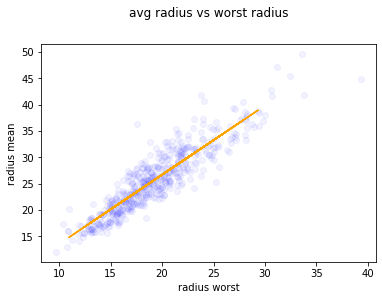

In [140]:
#Determine X and y 
X = df["radius_mean"].values
y = df["radius_worst"].values
X = X.reshape(-1,1)

plt.scatter(X_train, y_train,color='blue',alpha=0.05) 
plt.title('avg radius vs worst radius', y=1.1)
plt.ylabel('radius mean')
plt.xlabel('radius worst')
plt.plot(X_test, y_pred,color='orange')

plt.show()

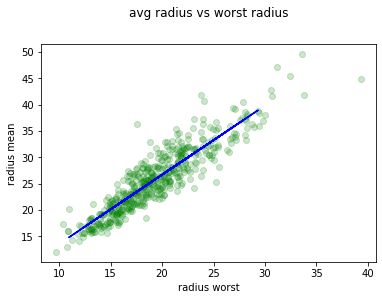

In [143]:
#Determine X and y 
X = df["compactness_mean"].values
y = df["compactness_worst"].values
X = X.reshape(-1,1)

plt.scatter(X_train, y_train,color='green',alpha=0.2) 
plt.title('avg radius vs worst radius', y=1.1)
plt.ylabel('radius mean')
plt.xlabel('radius worst')
plt.plot(X_test, y_pred,color='blue')

plt.show()

The linear regression presents that there is a direct correlation between the avreage measuments of a tumor and the worst measurment a patient has. 

The project shows that the average, se and worst mesurments of a patient's tumor should all be taken into account when trying to properly diagnos a patient. 